<font size="2" color="Black"><b>Authors : Deepak Kumar Singh<b><font><br><font size="2" color="black">Created : May, 2021 <font><br><font size="2" color="Black">Business Problem type: Predicting Loan Default <font> 
<div align="center"> <font size="2" color="red"><b><!--# For Citi Internal training purpose only #--></b></font> </div>

<font size="4" color="blue"><b>Problem Statement<b><font><br>
<font size="1" font-family: Arial color="black"><b>Problem Statement
A bank had collected data about historical loan default along with respective information for each member. 
We need to build a model that will help this bank by predicting the probability that a member will default.
<font>

### Importing libraries

In [82]:
# For Data manipulation and ML algo
import pandas as pd
import numpy as np
import sklearn

In [83]:
#### For Visaulisation purpose 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
#Import the dataset 
#import os 
#print(os.getcwd())
#os.chdir(r'C:\Users\HP\Desktop\Data Science\Project')'''

In [85]:
train1=pd.read_csv("train_data_1.csv")
train2=pd.read_csv("train_data_2.csv")

C:\Users\uvenkata\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [86]:
# Appending the two dataset
Default = pd.concat([train1, train2], axis=0)
Default.head(5).transpose()

,0,1,2,3,4
member_id,58189336,70011223,70255675,1893936,7652106
loan_amnt,14350,4800,10000,15000,16000
funded_amnt,14350,4800,10000,15000,16000
funded_amnt_inv,14350,4800,10000,15000,16000
term,36 months,36 months,36 months,36 months,36 months
batch_enrolled,NaN,BAT1586599,BAT1586599,BAT4808022,BAT2833642
int_rate,19.19,10.99,7.26,19.72,10.64
grade,E,B,A,D,B
sub_grade,E3,B4,A4,D5,B2
emp_title,clerk,Human Resources Specialist,Driver,Us office of Personnel Management,LAUSD-HOLLYWOOD HIGH SCHOOL


In [87]:
print("shape of {} is {}".format("train1",train1.shape))
print("shape of {} is {}".format("train2",train2.shape))
print("shape of {} is {}".format("Default",Default.shape))

shape of train1 is (270000, 45)
shape of train2 is (262428, 45)
shape of Default is (532428, 45)


In [88]:
# X_Default=Default.loc[:,Default.columns!='loan_status']
# Y_Default=pd.DataFrame(Default['loan_status'])
# Y_Default.value_counts()

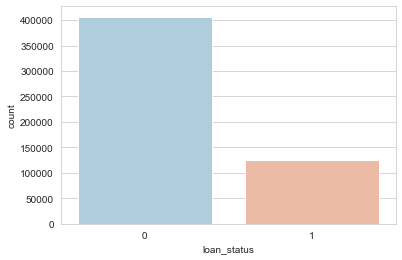

In [89]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',data=Default,palette='RdBu_r')

#### So it is a problem of class imbalance 

In [90]:
# X_Default.select_dtypes(include=['object']).nunique()

In [91]:
# check datatype of columns and filter object type columns to understand the further steps  
# Leave int and float as it is for now
Default.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
batch_enrolled                  object
int_rate                       float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                 

In [92]:
missing_cat=[var for var in Default.columns if Default[var].isnull().sum()>0 and Default[var].dtypes=='O']
missing_cat

['batch_enrolled',
 'emp_title',
 'emp_length',
 'desc',
 'title',
 'verification_status_joint']

In [93]:
Default[missing_cat]

,batch_enrolled,emp_title,emp_length,desc,title,verification_status_joint
0,NaN,clerk,9 years,NaN,Debt consolidation,NaN
1,BAT1586599,Human Resources Specialist,< 1 year,NaN,Home improvement,NaN
2,BAT1586599,Driver,2 years,NaN,Debt consolidation,NaN
3,BAT4808022,Us office of Personnel Management,10+ years,> My goal is to obtain a loan to pay off my hi...,Debt consolidation,NaN
4,BAT2833642,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,NaN,refi,NaN
...,...,...,...,...,...,...
262423,NaN,Registered Nurse,10+ years,NaN,Debt consolidation,NaN
262424,BAT2003848,Account Mgr,10+ years,NaN,Debt consolidation,NaN
262425,NaN,Comcast cable,8 years,NaN,Debt consolidation,NaN
262426,BAT3193689,Resident Physician,1 year,NaN,Credit card refinancing,NaN


In [94]:
for X in missing_cat:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default[X].isnull().sum(),(Default[X].isnull().sum()/532428)*100 ))

number and % of missing record for batch_enrolled are 191228 and 35.916217779681006% respectively
number and % of missing record for emp_title are 30833 and 5.791017752635098% respectively
number and % of missing record for emp_length are 26891 and 5.05063595453282% respectively
number and % of missing record for desc are 456829 and 85.80108484151849% respectively
number and % of missing record for title are 90 and 0.01690369402059997% respectively
number and % of missing record for verification_status_joint are 532123 and 99.94271525915241% respectively


In [95]:
Default['batch_enrolled'].value_counts()

BAT2252229    18791
BAT3873588    17839
BAT2803411    17111
BAT2078974    14859
BAT1586599    14463
              ...  
BAT4347689       30
BAT4884699       29
BAT5869156       26
BAT5077496       18
BAT2331079       13
Name: batch_enrolled, Length: 103, dtype: int64

#### Considering 85% and 99% data are missing, we can drop these columns for now
#### For batch enrolled as well there is no clear distinction of what should be treated as mode, so let's drop that for now 

In [96]:
Default_dropped=Default.drop(['member_id','batch_enrolled','verification_status_joint','desc'],axis=1)

##### We can create a seperate model in order to get the missing value treated but that will consume time, so for now applying the most easy way to deal with categorical data 

In [97]:
key=[]
value=[]
for X in ['emp_title',
 'emp_length',
 'title']:
    print("most appearing value for {} is {}".format(X,Default_dropped[X].mode()))

most appearing value for emp_title is 0    Teacher
dtype: object
most appearing value for emp_length is 0    10+ years
dtype: object
most appearing value for title is 0    Debt consolidation
dtype: object


In [98]:
# create a dictionary
keys=['emp_title',
 'emp_length',
 'title']

values=['Teacher','10+ years','Debt consolidation']

for i in [0,1,2]:
    Default_dropped[keys[i]].fillna(values[i],inplace=True)

In [99]:
# Check the number of missing now for all 18-3=15 categorical variable
for X in Default_dropped.select_dtypes(include=['object']).columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default_dropped[X].isnull().sum(),(Default_dropped[X].isnull().sum()/532428)*100 ))

number and % of missing record for term are 0 and 0.0% respectively
number and % of missing record for grade are 0 and 0.0% respectively
number and % of missing record for sub_grade are 0 and 0.0% respectively
number and % of missing record for emp_title are 0 and 0.0% respectively
number and % of missing record for emp_length are 0 and 0.0% respectively
number and % of missing record for home_ownership are 0 and 0.0% respectively
number and % of missing record for verification_status are 0 and 0.0% respectively
number and % of missing record for pymnt_plan are 0 and 0.0% respectively
number and % of missing record for purpose are 0 and 0.0% respectively
number and % of missing record for title are 0 and 0.0% respectively
number and % of missing record for zip_code are 0 and 0.0% respectively
number and % of missing record for addr_state are 0 and 0.0% respectively
number and % of missing record for initial_list_status are 0 and 0.0% respectively
number and % of missing record for appl

#### No missing records in categorical variable 

#### Similarly we can treat the missing for numberical (Int and Float) type columns

In [100]:
missing_cont1=[var for var in Default_dropped.describe().columns if Default_dropped[var].isnull().sum()>0 and (Default_dropped[var].dtypes=='Float64' or Default_dropped[var].dtypes=='Int64')]
missing_cont1

<ipython-input-100-7c43a161baf0>:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  missing_cont1=[var for var in Default_dropped.describe().columns if Default_dropped[var].isnull().sum()>0 and (Default_dropped[var].dtypes=='Float64' or Default_dropped[var].dtypes=='Int64')]


['annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [101]:
# Check the number of missing for all numberic columns 
for X in Default_dropped.describe().columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default_dropped[X].isnull().sum(),(Default_dropped[X].isnull().sum()/532428)*100 ))

number and % of missing record for loan_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt_inv are 0 and 0.0% respectively
number and % of missing record for int_rate are 0 and 0.0% respectively
number and % of missing record for annual_inc are 3 and 0.0005634564673533323% respectively
number and % of missing record for dti are 0 and 0.0% respectively
number and % of missing record for delinq_2yrs are 16 and 0.0030051011592177723% respectively
number and % of missing record for inq_last_6mths are 16 and 0.0030051011592177723% respectively
number and % of missing record for mths_since_last_delinq are 272554 and 51.19077133434005% respectively
number and % of missing record for mths_since_last_record are 450305 and 84.57575484384743% respectively
number and % of missing record for open_acc are 16 and 0.0030051011592177723% respectively
number and % of missing record for pub_rec are 16 

In [102]:
Default_dropped.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [103]:
# create a dictionary
keys1=['annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

for i in range (len(keys1)):
    Default_dropped[keys1[i]].fillna(Default_dropped[keys1[i]].median(),inplace=True)

In [104]:
# Check the number of missing for all numberic columns again 
for X in Default_dropped.describe().columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default_dropped[X].isnull().sum(),(Default_dropped[X].isnull().sum()/532428)*100 ))

number and % of missing record for loan_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt_inv are 0 and 0.0% respectively
number and % of missing record for int_rate are 0 and 0.0% respectively
number and % of missing record for annual_inc are 0 and 0.0% respectively
number and % of missing record for dti are 0 and 0.0% respectively
number and % of missing record for delinq_2yrs are 0 and 0.0% respectively
number and % of missing record for inq_last_6mths are 0 and 0.0% respectively
number and % of missing record for mths_since_last_delinq are 0 and 0.0% respectively
number and % of missing record for mths_since_last_record are 0 and 0.0% respectively
number and % of missing record for open_acc are 0 and 0.0% respectively
number and % of missing record for pub_rec are 0 and 0.0% respectively
number and % of missing record for revol_bal are 0 and 0.0% respectively
number and % of mis

#### No missing value can be seen now 

#### For categorical variable Either go for one hot encoding or check for some variable reduction technique to find the imp ones out of the set of these categorical variable variable
#### Using too many variables will create dimentional complexity, so we cannot just rely on one hot encoding for all variable 

In [105]:
# Check for number of unique entries in object type data types
Default_dropped.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'title', 'zip_code', 'addr_state', 'initial_list_status',
       'application_type', 'last_week_pay'],
      dtype='object')

In [106]:
Default_dropped.select_dtypes(include=['object']).nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              190124
emp_length                 11
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   39693
zip_code                  917
addr_state                 51
initial_list_status         2
application_type            2
last_week_pay              98
dtype: int64

## Coverting categories to numbers 


In [107]:
# Converting to same case 
for X in Default_dropped.select_dtypes(include=['object']).columns:
    Default_dropped[X]=Default_dropped[X].str.lower()

In [108]:
Default_dropped.head(5).transpose()

,0,1,2,3,4
loan_amnt,14350,4800,10000,15000,16000
funded_amnt,14350,4800,10000,15000,16000
funded_amnt_inv,14350,4800,10000,15000,16000
term,36 months,36 months,36 months,36 months,36 months
int_rate,19.19,10.99,7.26,19.72,10.64
grade,e,b,a,d,b
sub_grade,e3,b4,a4,d5,b2
emp_title,clerk,human resources specialist,driver,us office of personnel management,lausd-hollywood high school
emp_length,9 years,< 1 year,2 years,10+ years,10+ years
home_ownership,own,mortgage,own,rent,rent


In [109]:
# Exract the numeric part from term,last_week_pay ,emp_length,zip_code this can be inmportant 
cols = ['term','last_week_pay','emp_length','zip_code'] 
for col in cols:
    Default_dropped[col] = Default_dropped[col].str.extract('(\d*\.?\d+)', expand=True)

In [112]:
Default_dropped[['term','last_week_pay','emp_length']].head(5).transpose()

,0,1,2,3,4
term,36,36,36,36,36
last_week_pay,26,9,9,135,96
emp_length,9,1,2,10,10


In [113]:
for X in Default_dropped.columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default_dropped[X].isnull().sum(),(Default_dropped[X].isnull().sum()/532428)*100 ))

number and % of missing record for loan_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt_inv are 0 and 0.0% respectively
number and % of missing record for term are 0 and 0.0% respectively
number and % of missing record for int_rate are 0 and 0.0% respectively
number and % of missing record for grade are 0 and 0.0% respectively
number and % of missing record for sub_grade are 0 and 0.0% respectively
number and % of missing record for emp_title are 0 and 0.0% respectively
number and % of missing record for emp_length are 0 and 0.0% respectively
number and % of missing record for home_ownership are 0 and 0.0% respectively
number and % of missing record for annual_inc are 0 and 0.0% respectively
number and % of missing record for verification_status are 0 and 0.0% respectively
number and % of missing record for pymnt_plan are 0 and 0.0% respectively
number and % of missing record for 

In [114]:
# Default_dropped['last_week_pay'].fillna(Default_dropped['last_week_pay'].mode(),inplace=True)

In [115]:
Default_dropped['last_week_pay'].value_counts()

13     30333
9      28626
26     27475
22     26000
4      25704
       ...  
274        1
300        1
283        1
278        1
269        1
Name: last_week_pay, Length: 97, dtype: int64

In [116]:
 Default_dropped['last_week_pay'].fillna(13,inplace=True)

In [117]:
for X in Default_dropped.columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default_dropped[X].isnull().sum(),(Default_dropped[X].isnull().sum()/532428)*100 ))

number and % of missing record for loan_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt_inv are 0 and 0.0% respectively
number and % of missing record for term are 0 and 0.0% respectively
number and % of missing record for int_rate are 0 and 0.0% respectively
number and % of missing record for grade are 0 and 0.0% respectively
number and % of missing record for sub_grade are 0 and 0.0% respectively
number and % of missing record for emp_title are 0 and 0.0% respectively
number and % of missing record for emp_length are 0 and 0.0% respectively
number and % of missing record for home_ownership are 0 and 0.0% respectively
number and % of missing record for annual_inc are 0 and 0.0% respectively
number and % of missing record for verification_status are 0 and 0.0% respectively
number and % of missing record for pymnt_plan are 0 and 0.0% respectively
number and % of missing record for 

In [118]:
# Convert extracted columns to numeric format 
# Default_dropped.dtypes
for col in cols:
    Default_dropped[col] = pd.to_numeric(Default_dropped[col])

In [119]:
#Label Encoding for object to numeric conversion
# We can use other techniques but that may decrease the efficiency 
objList = categorylist = ['grade','sub_grade']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    Default_dropped[feat] = le.fit_transform(Default_dropped[feat])

print (Default_dropped.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532428 entries, 0 to 262427
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    532428 non-null  int64  
 1   funded_amnt                  532428 non-null  int64  
 2   funded_amnt_inv              532428 non-null  float64
 3   term                         532428 non-null  int64  
 4   int_rate                     532428 non-null  float64
 5   grade                        532428 non-null  int32  
 6   sub_grade                    532428 non-null  int32  
 7   emp_title                    532428 non-null  object 
 8   emp_length                   532428 non-null  int64  
 9   home_ownership               532428 non-null  object 
 10  annual_inc                   532428 non-null  float64
 11  verification_status          532428 non-null  object 
 12  pymnt_plan                   532428 non-null  object 
 13 

#### One Hot Encoding
##### home_ownership,verification_status,pymnt_plan,purpose,,addr_state,initial_list_status,application_type--- One Hot encoding as order does not hold importance 


In [120]:
Default_dropped.select_dtypes(include=['object']).columns

Index(['emp_title', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'title', 'addr_state', 'initial_list_status',
       'application_type'],
      dtype='object')

In [121]:
Default_treated=pd.get_dummies(Default_dropped, columns=['home_ownership', 'verification_status', 'pymnt_plan',
                                         'purpose','addr_state', 'initial_list_status','application_type'],drop_first=True)

In [122]:
Default_treated.head(5).transform
Default_treated.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,annual_inc,zip_code,...,addr_state_tx,addr_state_ut,addr_state_va,addr_state_vt,addr_state_wa,addr_state_wi,addr_state_wv,addr_state_wy,initial_list_status_w,application_type_joint
count,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,5.324280e+05,532428.000000,...,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000
mean,14757.595722,14744.271291,14704.926696,43.195790,13.242969,1.797141,10.954745,6.291410,7.502979e+04,511.414958,...,0.079874,0.007192,0.029724,0.001995,0.021907,0.012922,0.004911,0.002250,0.485343,0.000573
std,8434.420080,8429.139277,8441.290381,10.996354,4.379611,1.312184,6.489916,3.550671,6.519967e+04,313.237389,...,0.271098,0.084498,0.169826,0.044617,0.146381,0.112938,0.069910,0.047382,0.499786,0.023927
min,500.000000,500.000000,0.000000,36.000000,5.320000,0.000000,0.000000,1.000000,1.200000e+03,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,36.000000,9.990000,1.000000,6.000000,3.000000,4.500000e+04,226.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,36.000000,12.990000,2.000000,10.000000,7.000000,6.500000e+04,475.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,60.000000,16.200000,3.000000,15.000000,10.000000,9.000000e+04,802.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,28.990000,6.000000,34.000000,10.000000,9.500000e+06,999.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Since we have huge variance in categorical variable emp_title and  title columns , we can just create some indicators with titles with maximum occurance ( Overall and with event as 1)

In [123]:
# finding out titles with max entries 
Default_treated['emp_title'].value_counts()
# Debt consolidation,Credit card refinancing,Home improvement,Other                                  


# Finding out titles with highest event 
# Default_treated['emp_title'].where(Default_treated["loan_status"]==0).value_counts()
Default_treated['emp_title'].where(Default_treated["loan_status"]==1).value_counts()
# Debt consolidation,Credit card refinancing 

teacher                            7607
manager                            1257
registered nurse                    607
supervisor                          601
sales                               514
                                   ... 
field rn-case manager                 1
newtype, inc                          1
century vision deveopers              1
bella's italian cafe                  1
axcess financial services, inc.       1
Name: emp_title, Length: 65310, dtype: int64

In [124]:
Default_treated['emp_titl_teacher']=np.where(Default_treated['emp_title']=='teacher',1,0)
Default_treated['emp_titl_manager']=np.where(Default_treated['emp_title']=='manager',1,0)

In [125]:
# Default_treated['emp_titl_teacher'].value_counts()

In [126]:
Default_treated.loc[Default_treated['emp_titl_teacher']==1,:]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,annual_inc,...,addr_state_va,addr_state_vt,addr_state_wa,addr_state_wi,addr_state_wv,addr_state_wy,initial_list_status_w,application_type_joint,emp_titl_teacher,emp_titl_manager
17,30750,30750,30700.0,36,16.99,3,15,teacher,10,70000.0,...,0,0,0,0,0,0,0,0,1,0
28,15000,15000,15000.0,36,6.92,0,3,teacher,3,90000.0,...,0,0,0,0,0,0,1,0,1,0
33,20000,20000,20000.0,36,8.18,1,5,teacher,9,50000.0,...,0,0,0,0,0,0,0,0,1,0
35,10000,10000,10000.0,60,19.52,4,22,teacher,10,29500.0,...,0,0,0,0,0,0,1,0,1,0
36,5000,5000,5000.0,36,13.98,2,12,teacher,10,19000.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262382,9775,9775,9775.0,36,16.55,3,16,teacher,10,40000.0,...,0,0,0,0,0,0,1,0,1,0
262392,9400,9400,9400.0,36,9.76,1,5,teacher,5,47000.0,...,0,0,0,0,0,0,0,0,1,0
262394,12800,12800,12800.0,60,16.99,3,17,teacher,10,75000.0,...,0,0,0,0,0,0,1,0,1,0
262418,10000,10000,10000.0,36,9.76,1,7,teacher,9,54000.0,...,0,0,0,0,0,0,1,0,1,0


In [127]:
Default_treated

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,annual_inc,...,addr_state_va,addr_state_vt,addr_state_wa,addr_state_wi,addr_state_wv,addr_state_wy,initial_list_status_w,application_type_joint,emp_titl_teacher,emp_titl_manager
0,14350,14350,14350.0,36,19.19,4,22,clerk,9,28700.0,...,0,0,0,0,0,0,0,0,0,0
1,4800,4800,4800.0,36,10.99,1,8,human resources specialist,1,65000.0,...,0,0,0,0,0,0,1,0,0,0
2,10000,10000,10000.0,36,7.26,0,3,driver,2,45000.0,...,0,0,0,0,0,0,1,0,0,0
3,15000,15000,15000.0,36,19.72,3,19,us office of personnel management,10,105000.0,...,1,0,0,0,0,0,0,0,0,0
4,16000,16000,16000.0,36,10.64,1,6,lausd-hollywood high school,10,52000.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262423,20000,20000,20000.0,36,12.49,1,9,registered nurse,10,75000.0,...,0,0,0,0,0,0,0,0,0,0
262424,12000,12000,12000.0,60,14.99,2,14,account mgr,10,59000.0,...,0,0,0,0,0,0,1,0,0,0
262425,18725,18725,18725.0,60,20.80,4,20,comcast cable,8,42504.0,...,0,0,0,0,0,0,0,0,0,0
262426,21000,21000,21000.0,60,16.29,3,16,resident physician,1,50000.0,...,0,0,0,0,0,0,1,0,0,0


In [128]:
# finding out titles with max entries 
Default_treated['title'].value_counts()
# Debt consolidation,Credit card refinancing,Home improvement,Other                                  


# Finding out titles with highest event 
Default_treated['title'].where(Default_treated["loan_status"]==0).value_counts()
Default_treated['title'].where(Default_treated["loan_status"]==1).value_counts()
# Debt consolidation,Credit card refinancing 

debt consolidation         42928
credit card refinancing    11559
home improvement            4372
other                       2885
consolidation               2610
                           ...  
long time dream                1
freedom loan!!!                1
hangin' in there               1
re-group                       1
sue                            1
Name: title, Length: 22679, dtype: int64

In [129]:
Default_treated['emp_titl_debt_cons']=np.where(Default_treated['title']=='debt consolidation',1,0)
Default_treated['emp_titl_credit_card']=np.where(Default_treated['title']=='credit card refinancing',1,0)
Default_treated['emp_titl_home_imp']=np.where(Default_treated['title']=='home improvement',1,0)

In [130]:
# Default_treated[['emp_titl_home_imp']].value_counts()

In [131]:
Default_treated[['emp_titl_home_imp','title']].loc[Default_treated['emp_titl_home_imp']==1,:]

,emp_titl_home_imp,title
1,1,home improvement
8,1,home improvement
52,1,home improvement
76,1,home improvement
84,1,home improvement
...,...,...
262343,1,home improvement
262380,1,home improvement
262397,1,home improvement
262404,1,home improvement


In [132]:
Default_ready=Default_treated.drop(['title','emp_title'],axis=1)

In [133]:
Default_ready.shape

(532428, 110)

### Outlier Treatment 
#### Calculate 99% and 1% percentile as cap and floor for each column, the if value >= 99% percentile then redefine the value as the value of 99% percentile; similarly if value <= 1% percentile then redefine value as the value of 1% percentile

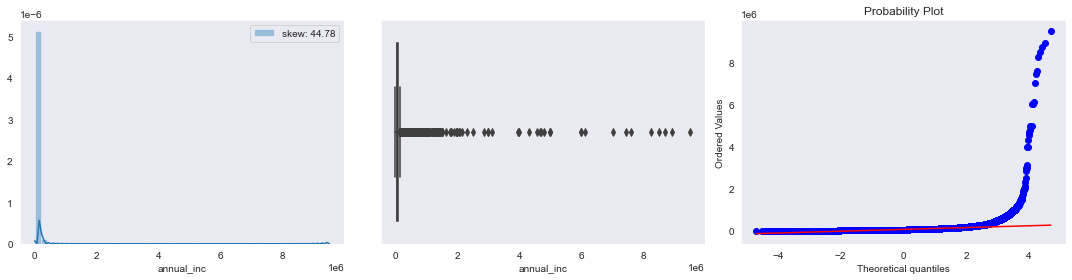

C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


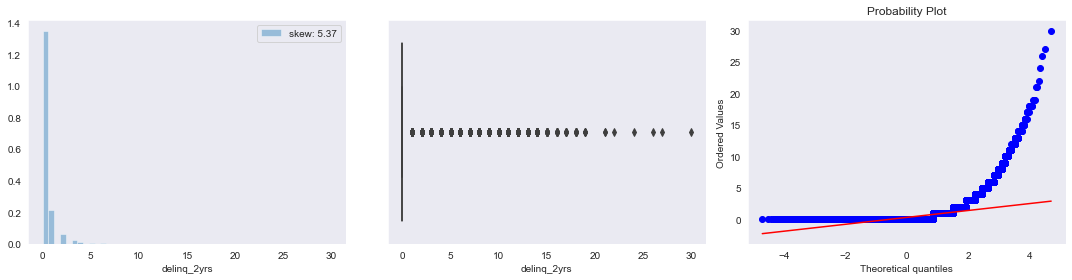

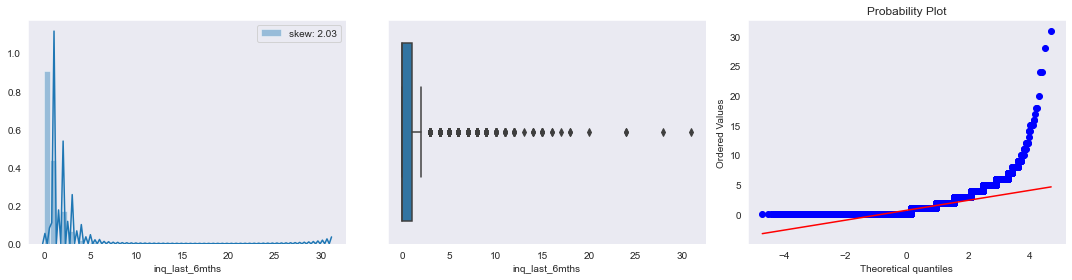

C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


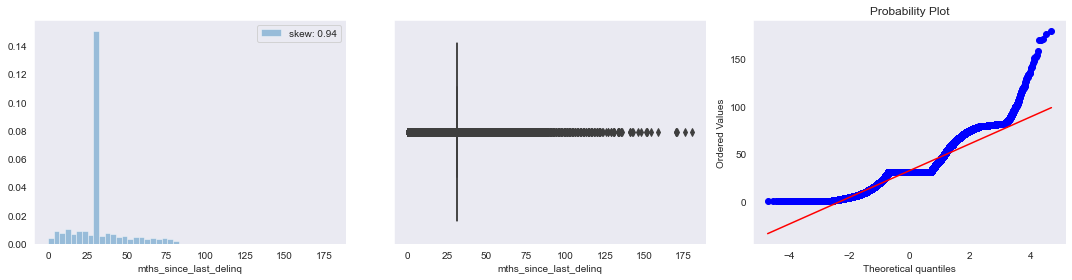

C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


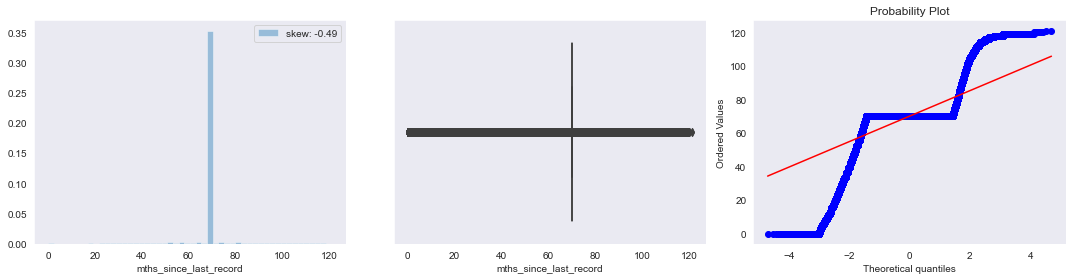

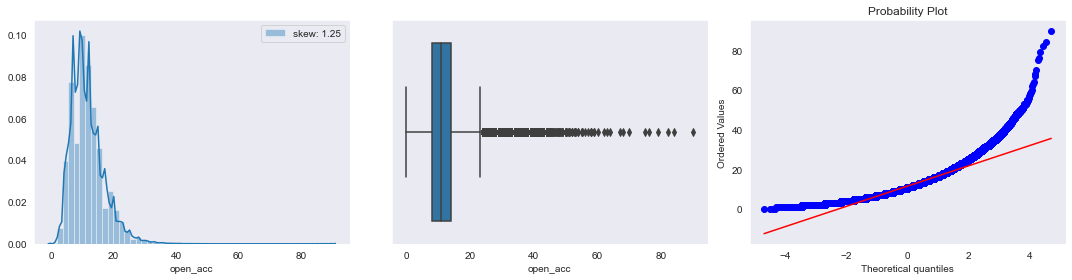

C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


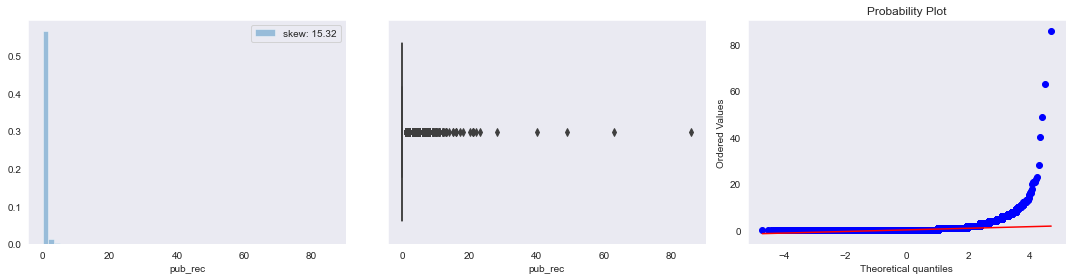

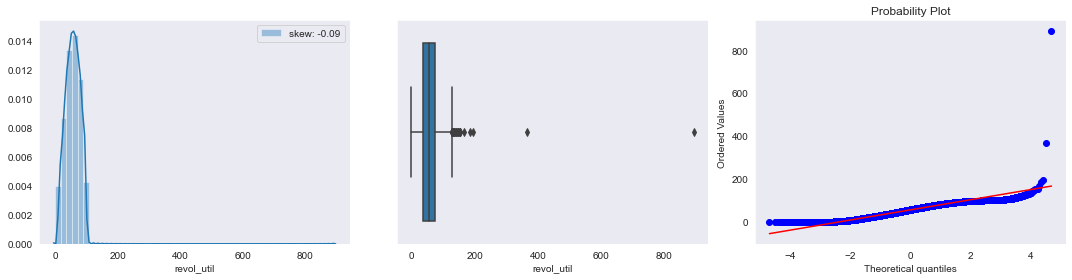

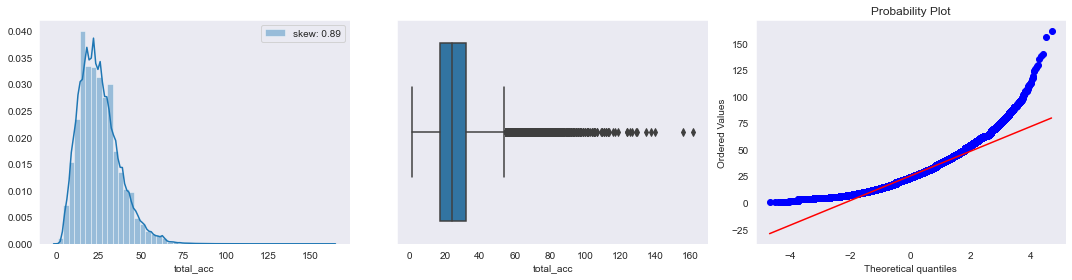

C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


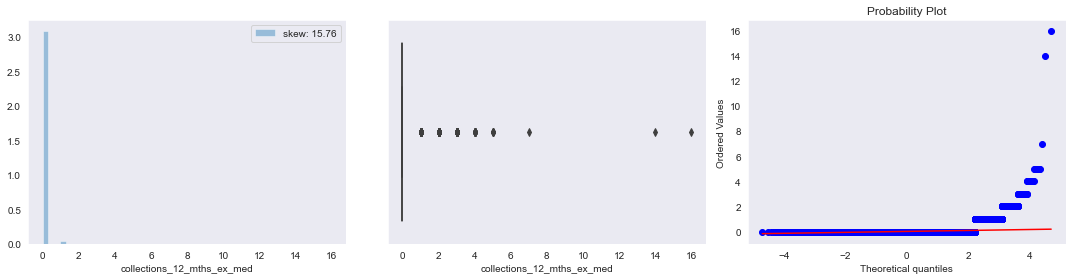

C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


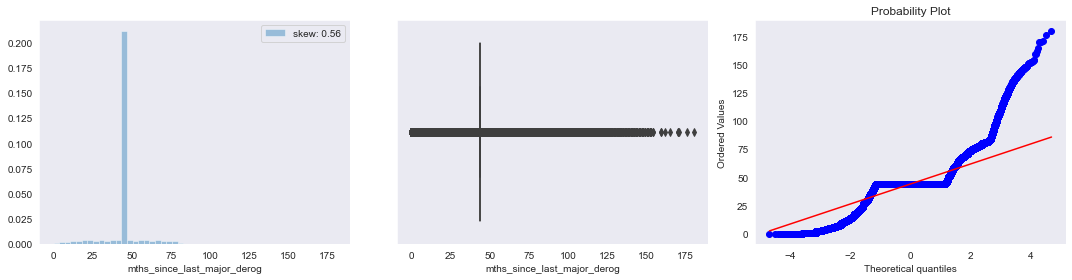

C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


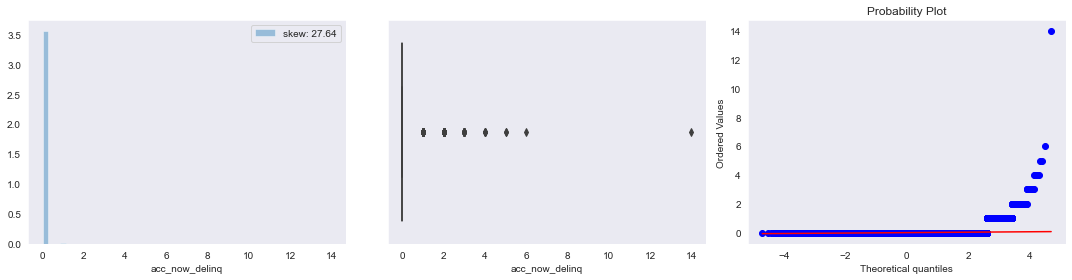

C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


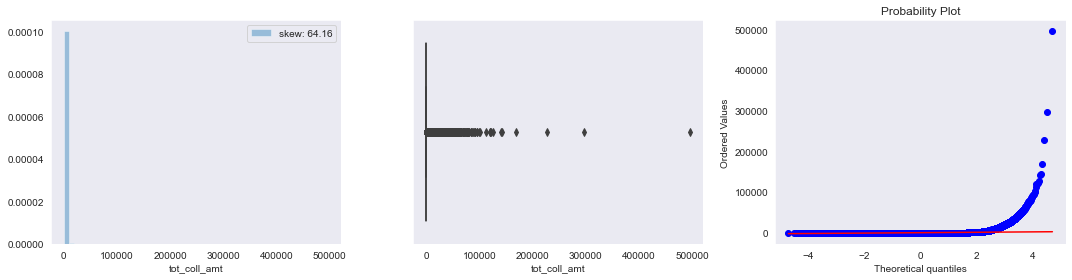

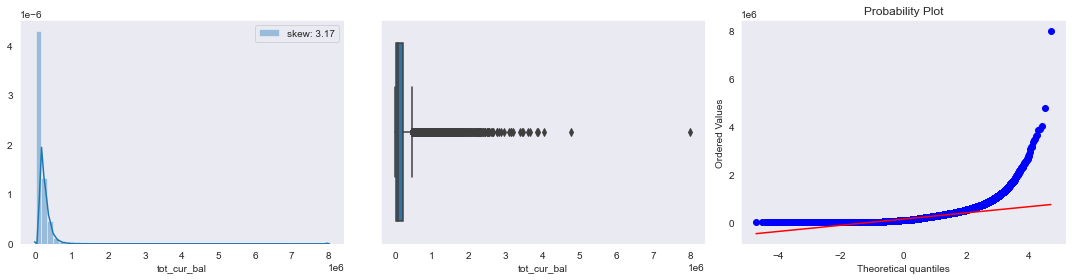

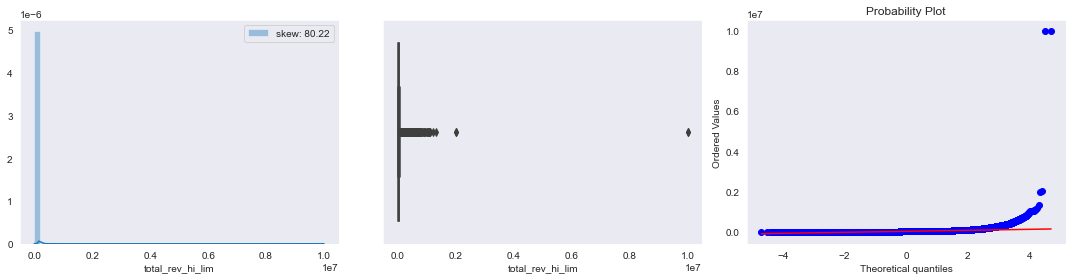

In [134]:
# Ploting graph for each varables to understand outliers
from scipy import stats

df=Default_ready
sns.set_style('dark')
for col in keys1:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [137]:
# Finding skew before and after to compare the shape after treatment 
# We can use SD, IQR, SKEW etc

for X in keys1:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,Default_ready[X].skew(),np.max(abs(stats.zscore(Default_ready[X])))))

The skewness and Max_Z-Score value for annual_inc is 44.776335643422435 and 144.5556348608307 respectively
The skewness and Max_Z-Score value for delinq_2yrs is 5.373390129655151 and 34.51677214966393 respectively
The skewness and Max_Z-Score value for inq_last_6mths is 2.0343748749182105 and 30.396094539481616 respectively
The skewness and Max_Z-Score value for mths_since_last_delinq is 0.9448200742724097 and 9.599928660857135 respectively
The skewness and Max_Z-Score value for mths_since_last_record is -0.48867195430914645 and 6.335395389569671 respectively
The skewness and Max_Z-Score value for open_acc is 1.251540526647763 and 14.771065381901064 respectively
The skewness and Max_Z-Score value for pub_rec is 15.318404463982228 and 146.97347285696503 respectively
The skewness and Max_Z-Score value for revol_util is -0.08970653577155917 and 35.10892368694777 respectively
The skewness and Max_Z-Score value for total_acc is 0.8932172177537108 and 11.545419795029488 respectively
The skew

In [ ]:
# Default['pub_rec'].value_counts()
# 0.0     451040
# 1.0      67938

# Default['collections_12_mths_ex_med'].value_counts()
# 0.0     525346
# 1.0       6494

# Default['tot_coll_amt'].value_counts()
# 0.0        420903
# 50.0         1053

# Default['acc_now_delinq'].value_counts()
# 0.0     529949
# 1.0       2304

#### So we can see here that skewness will be there as most of the records have 0 as their feed, so will leave these columns untouched 

In [138]:
col_sel=['annual_inc','tot_cur_bal','total_rev_hi_lim']
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))


iqr_capping(Default_ready, col_sel, 1.5)

In [139]:
# Finding skew to compare the shape after treatment 
from scipy import stats
for X in keys1:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,Default_treated[X].skew(),np.max(abs(stats.zscore(Default_treated[X])))))

The skewness and Max_Z-Score value for annual_inc is 44.776335643422435 and 144.5556348608307 respectively
The skewness and Max_Z-Score value for delinq_2yrs is 5.373390129655151 and 34.51677214966393 respectively
The skewness and Max_Z-Score value for inq_last_6mths is 2.0343748749182105 and 30.396094539481616 respectively
The skewness and Max_Z-Score value for mths_since_last_delinq is 0.9448200742724097 and 9.599928660857135 respectively
The skewness and Max_Z-Score value for mths_since_last_record is -0.48867195430914645 and 6.335395389569671 respectively
The skewness and Max_Z-Score value for open_acc is 1.251540526647763 and 14.771065381901064 respectively
The skewness and Max_Z-Score value for pub_rec is 15.318404463982228 and 146.97347285696503 respectively
The skewness and Max_Z-Score value for revol_util is -0.08970653577155917 and 35.10892368694777 respectively
The skewness and Max_Z-Score value for total_acc is 0.8932172177537108 and 11.545419795029488 respectively
The skew

In [140]:
Default_ready.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'annual_inc', 'zip_code',
       ...
       'addr_state_wi', 'addr_state_wv', 'addr_state_wy',
       'initial_list_status_w', 'application_type_joint', 'emp_titl_teacher',
       'emp_titl_manager', 'emp_titl_debt_cons', 'emp_titl_credit_card',
       'emp_titl_home_imp'],
      dtype='object', length=110)

In [142]:
# Having converted all to numeric variables we can check for correlation to find out not so important variable 
correlation=Default_ready.corr()
correlation['loan_status'].sort_values()

initial_list_status_w   -0.229466
emp_titl_debt_cons      -0.168788
emp_titl_credit_card    -0.134121
dti                     -0.134020
term                    -0.130959
                           ...   
addr_state_ca            0.040598
purpose_wedding          0.061265
inq_last_6mths           0.087306
last_week_pay            0.266602
loan_status              1.000000
Name: loan_status, Length: 110, dtype: float64

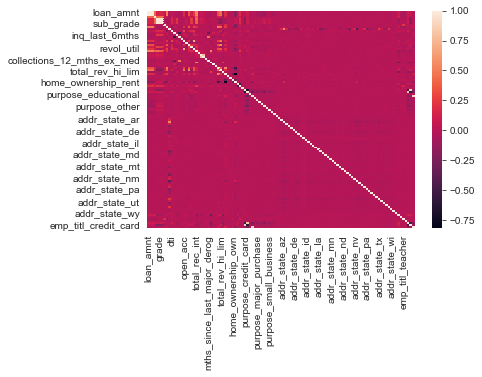

In [143]:
sns.heatmap(correlation)

#### These columns have low correlation, so we can remove that if we want, but since these seems important variables so will leave it till we get confirmation on the gravity of such variables
<!-- annual_inc                    -0.009099
mths_since_last_major_derog   -0.004959
total_rec_late_fee            -0.004353
home_ownership                -0.003807
total_acc                     -0.002636
pymnt_plan                     0.000125
int_rate                       0.002590
mths_since_last_delinq         0.014776 -->

In [144]:
Default_ready.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,annual_inc,zip_code,...,addr_state_wi,addr_state_wv,addr_state_wy,initial_list_status_w,application_type_joint,emp_titl_teacher,emp_titl_manager,emp_titl_debt_cons,emp_titl_credit_card,emp_titl_home_imp
0,14350,14350,14350.0,36,19.19,4,22,9,28700.0,349,...,0,0,0,0,0,0,0,1,0,0
1,4800,4800,4800.0,36,10.99,1,8,1,65000.0,209,...,0,0,0,1,0,0,0,0,0,1
2,10000,10000,10000.0,36,7.26,0,3,2,45000.0,447,...,0,0,0,1,0,0,0,1,0,0
3,15000,15000,15000.0,36,19.72,3,19,10,105000.0,221,...,0,0,0,0,0,0,0,1,0,0
4,16000,16000,16000.0,36,10.64,1,6,10,52000.0,900,...,0,0,0,1,0,0,0,0,0,0


In [145]:
Default_filtered=Default_ready.iloc[:10000,:]
Default_filtered2=Default_ready.iloc[:1000,:]

In [146]:
for X in Default_filtered.columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default_ready[X].isnull().sum(),(Default_ready[X].isnull().sum()/10000)*100 ))

number and % of missing record for loan_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt_inv are 0 and 0.0% respectively
number and % of missing record for term are 0 and 0.0% respectively
number and % of missing record for int_rate are 0 and 0.0% respectively
number and % of missing record for grade are 0 and 0.0% respectively
number and % of missing record for sub_grade are 0 and 0.0% respectively
number and % of missing record for emp_length are 0 and 0.0% respectively
number and % of missing record for annual_inc are 0 and 0.0% respectively
number and % of missing record for zip_code are 0 and 0.0% respectively
number and % of missing record for dti are 0 and 0.0% respectively
number and % of missing record for delinq_2yrs are 0 and 0.0% respectively
number and % of missing record for inq_last_6mths are 0 and 0.0% respectively
number and % of missing record for mths_since_last_

In [ ]:
# we can check for pair plot | Not using the entire data due to resource constraint 
# Default_filtered_test=Default_ready.iloc[:1000,:]
# sns.pairplot(Default_filtered_test, diag_kind='kde',hue='loan_status')

**Distribution of train attributes**

In [147]:
%%time 

#Distribution of train attributes-

def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style('darkgrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in train_attributes :
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

Wall time: 0 ns


In [ ]:
%%time
#Corresponding to negative class-
t0=Default_filtered2[Default_filtered2.loan_status.values==0]

#Corresponding to possitive class-a

t1=Default_filtered2[Default_filtered2.loan_status.values==1]

#train attributes 
train_attributes=Default_filtered2.columns.values[1:10]
# train_attributes=Default_ready.loc[:,Default_ready.columns!='loan_status']

#Plot distribution of train attributes-
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

In [148]:
# Let's check multicollinearity 
# to calculated VIF we can use the loop
Default_indep=Default_filtered.loc[:,Default_filtered.columns!='loan_status']

import statsmodels.api as sm
features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of funded_amnt is 0.9990126026009791
VIF for funded_amnt is 1012.76
R-Sqr value of funded_amnt_inv is 0.9961654010351354
VIF for funded_amnt_inv is 260.78
R-Sqr value of term is 0.397260261291873
VIF for term is 1.66
R-Sqr value of int_rate is 0.9716930775201896
VIF for int_rate is 35.33
R-Sqr value of grade is 0.953321684201229
VIF for grade is 21.42
R-Sqr value of sub_grade is 0.9819610677366265
VIF for sub_grade is 55.44
R-Sqr value of emp_length is 0.12959297622562516
VIF for emp_length is 1.15
R-Sqr value of annual_inc is 0.5486556992046481
VIF for annual_inc is 2.22
R-Sqr value of zip_code is 0.9980552711764465
VIF for zip_code is 514.21
R-Sqr value of dti is 0.330366944968732
VIF for dti is 1.49
R-Sqr value of delinq_2yrs is 0.29214082179461787
VIF for delinq_2yrs is 1.41
R-Sqr value of inq_last_6mths is 0.17334972318113107
VIF for inq_last_6mths is 1.21
R-Sqr value of mths_since_last_delinq is 0.3508501791002592
VIF for mths_since_last_delinq is 1.54
R-Sqr value of 

C:\Users\uvenkata\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


R-Sqr value of pymnt_plan_y is nan
VIF for pymnt_plan_y is nan
R-Sqr value of purpose_credit_card is 0.9513955020003487
VIF for purpose_credit_card is 20.57
R-Sqr value of purpose_debt_consolidation is 0.9602437085437009
VIF for purpose_debt_consolidation is 25.15
R-Sqr value of purpose_educational is 0.0202279984521615
VIF for purpose_educational is 1.02
R-Sqr value of purpose_home_improvement is 0.9089401384030119
VIF for purpose_home_improvement is 10.98
R-Sqr value of purpose_house is 0.22282763352446444
VIF for purpose_house is 1.29
R-Sqr value of purpose_major_purchase is 0.6377514077827893
VIF for purpose_major_purchase is 2.76
R-Sqr value of purpose_medical is 0.43110719346253934
VIF for purpose_medical is 1.76
R-Sqr value of purpose_moving is 0.34077666197506273
VIF for purpose_moving is 1.52
R-Sqr value of purpose_other is 0.8087260562778786
VIF for purpose_other is 5.23
R-Sqr value of purpose_renewable_energy is 0.029625116186787315
VIF for purpose_renewable_energy is 1.03
R

#### Varibales ABC have high correlation, so either we can remove XYZ and re-run the VIF else use techniques like PCA to get rid of this

In [149]:
#We can reduce the multicollinearity with PCA 

from sklearn.decomposition import PCA
pca=PCA()

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
scalar=StandardScaler()

scalar.fit(Default_indep)
scaled_df=scalar.transform(Default_indep)

In [152]:
# finding the PCA
PCA_result=pca.fit(scaled_df)
PCA_result.components_

array([[ 3.78456524e-01,  3.78384394e-01,  3.78059959e-01, ...,
         7.73239606e-02, -2.52788022e-02,  3.45533088e-03],
       [-2.63784444e-02, -2.67063815e-02, -2.72083388e-02, ...,
         1.36795819e-01, -2.04113673e-01, -6.28673969e-02],
       [ 4.24097627e-02,  4.19259235e-02,  4.10620665e-02, ...,
        -4.80513236e-01,  3.71643963e-01,  1.21712389e-01],
       ...,
       [ 0.00000000e+00, -2.67418117e-17,  2.79654762e-17, ...,
         2.69204352e-17, -4.14610979e-17,  3.05552362e-17],
       [-0.00000000e+00,  4.30136311e-19,  2.15276125e-19, ...,
        -6.95159735e-18,  1.96017479e-17, -2.41428982e-17],
       [-0.00000000e+00, -3.16822295e-18,  2.69502811e-18, ...,
         1.22333987e-17,  7.06321019e-18, -8.69814700e-18]])

In [153]:
PCA_result.explained_variance_

array([5.38324302e+00, 4.02283905e+00, 2.89309118e+00, 2.47488440e+00,
       2.15519972e+00, 1.99107272e+00, 1.94087404e+00, 1.89140959e+00,
       1.77363148e+00, 1.65970616e+00, 1.52303830e+00, 1.37005122e+00,
       1.30989041e+00, 1.26151112e+00, 1.21406946e+00, 1.16421698e+00,
       1.11950388e+00, 1.11227133e+00, 1.10633101e+00, 1.10538088e+00,
       1.09905422e+00, 1.09372984e+00, 1.08471890e+00, 1.08115002e+00,
       1.06875818e+00, 1.06701939e+00, 1.06328096e+00, 1.05451363e+00,
       1.04982623e+00, 1.04418565e+00, 1.03960837e+00, 1.03726840e+00,
       1.03226369e+00, 1.03113478e+00, 1.02913425e+00, 1.02824978e+00,
       1.02555115e+00, 1.02334035e+00, 1.02094111e+00, 1.02010352e+00,
       1.01826979e+00, 1.01657493e+00, 1.01623235e+00, 1.01438172e+00,
       1.01275271e+00, 1.01181607e+00, 1.01128116e+00, 1.00980604e+00,
       1.00858259e+00, 1.00816006e+00, 1.00562787e+00, 1.00514776e+00,
       1.00382784e+00, 1.00378680e+00, 1.00287322e+00, 9.99527750e-01,
      

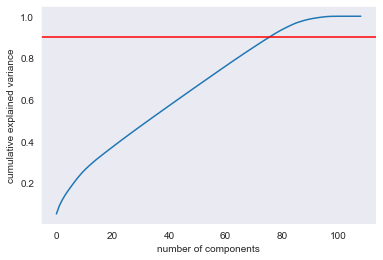

In [154]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=.9,color='r')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

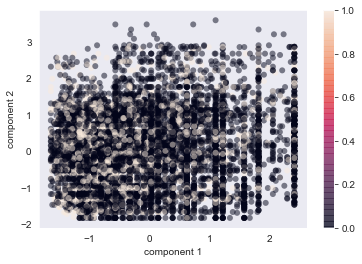

In [155]:
plt.scatter(scaled_df[:, 0],scaled_df[:, 4],
            c=Default_filtered.loan_status, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [156]:
pca=PCA(n_components=90)
x_pca=pca.fit_transform(scaled_df)
final_train_X=pd.DataFrame(x_pca) 
X=final_train_X

In [157]:
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from pdpbox import pdp, get_dataset, info_plots
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc


random_state=42
np.random.seed(random_state)
import warnings
warnings.filterwarnings('ignore')

In [162]:
#Spliting the data via Sratified KFold Cross Validator:-

#Training Data:
# X=final_train.drop(['loan_status'],axis=1)
Y=Default_filtered['loan_status']

#Stratified KFold Cross Validator:-
#Same proportion of different class are present in train and test:StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, valid_index in skf.split(X,Y): 
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] 
    y_train, y_valid = Y.iloc[train_index], Y.iloc[valid_index]
    
print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (8000, 90)
Shape of X_valid : (2000, 90)
Shape of y_train : (8000,)
Shape of y_valid : (2000,)


In [160]:
%%time
lr_model=LogisticRegression(random_state=42)
#fitting the model-
lr_model.fit(X_train,y_train)

Wall time: 155 ms


LogisticRegression(random_state=42)

In [161]:
#Accuracy of model-
lr_score=lr_model.score(X_train,y_train)
print('Accuracy of lr_model :',lr_score)

Accuracy of lr_model : 0.800125


In [164]:
%%time
#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(lr_model,X_valid,y_valid,cv=5)
#Cross validation score-
cv_score=cross_val_score(lr_model,X_valid,y_valid,cv=5)
print('cross val score :',np.average(cv_score))

cross val score : 0.788
Wall time: 439 ms


- Accuracy of the model is not th best metric to use while evaluating the imbalanced datasets as it may be misleading.
  We are going to change the performance metric.

**Confusion Matrix:-**

In [165]:
#Confusion matrix:-
cm=confusion_matrix(y_valid,cv_predict)
cm=pd.crosstab(y_valid,cv_predict)
cm

col_0,0,1
loan_status,,
0,1426,115
1,309,150


In [166]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_valid,cv_predict)
print('ROC Score:',roc_score)

ROC Score: 0.6260852599746366


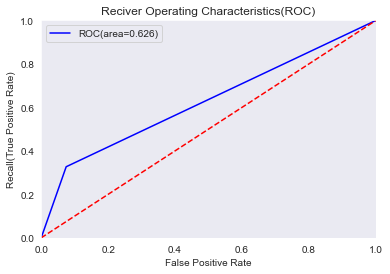

AUC: 0.6260852599746366


In [167]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

Observation:- On comparing roc_auc_score and model accuracy, model is not performing well on imbalanced data.

In [168]:
#Classification report:-
classification_scores=classification_report(y_valid,cv_predict)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1541
           1       0.57      0.33      0.41       459

    accuracy                           0.79      2000
   macro avg       0.69      0.63      0.64      2000
weighted avg       0.76      0.79      0.77      2000



**Observation:-** As we see that f1 score is high for the customers who will not make a transaction, compare to those who will make a transaction.
    So, we are going to change the algorithm.

In [169]:
Default_filtered_test=Default_ready.iloc[10000:15000,:]

In [170]:
%%time
#Model performance on test data:-
X_test=Default_filtered_test.drop(['loan_status'],axis=1)

x_pca_test=pca.fit_transform(X_test)
final_test_X=pd.DataFrame(x_pca_test) 
X_test_fin=final_test_X

lr_pred=lr_model.predict(X_test_fin)
print(lr_pred)

[1 1 0 ... 1 1 0]
Wall time: 39.9 ms


**Oversample Minority Class:-** 

    -Adding more copies of minority class.
    -It can be a good option we dont have that much large data to work.
    -Drawback of this process is we are adding info. That can lead to overfitting or poor performance on test data.

**Undersample Mojorityclass:-**
    
    -Removing some copies of majority class.
    -It can be a good option if we have very large amount of data say in millions to work.
    -Drawback of this process is we are removing some valuable info. that can leads to underfitting & poor performance on        test data.

As per the drawbacks of both the model we will use SMOTE ( Synthetic Minority Oversampling technique) that is more best than the above as compare to above one's.

**SMOTE ( Synthetic Minority Oversampling technique):-** This is a statistical technique for increasing the number of cases in your dataset in a balanced way. It uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.

In [171]:
pip install imbalanced-learn

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\uvenkata\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: joblib
    Found existing installation: joblib 0.16.0
    Uninstalling joblib-0.16.0:
      Successfully uninstalled joblib-0.16.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [172]:
pip install delayed

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%%time
import imblearn
from imblearn.over_sampling import SMOTE
#SMOTE:-
sm = SMOTE(random_state=42, sample_strategy=0.4)
#Generating synthetic data points
X_smote,y_smote=sm.fit_resample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_resample(X_valid,y_valid)

**Building Logistsic regression model on synthetic data points:-**

In [ ]:
%%time
#Logistic regression model for SMOTE:-
smote=LogisticRegression(random_state=42)
#fitting the smote model:-
smote.fit(X_smote,y_smote)

In [ ]:
#Accuracy of the model:-
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

In [ ]:
%%time
#Cross validation prediction for SMOTE:-
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score:-
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('Cross validation score :',np.average(cv_score))

In [ ]:
%%time
#Confusion matrix:-
cm=confusion_matrix(y_smote_v,cv_pred)
cm=pd.crosstab(y_smote_v,cv_pred)
cm

In [ ]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_smote_v,cv_pred)
print('ROC score:',roc_score)

In [ ]:
#ROC_AUC Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

### Link for XG Boost and XGBoost

https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

https://www.youtube.com/watch?v=kho6oANGu_A

https://www.youtube.com/watch?v=OtD8wVaFm6E&t=262s

https://www.youtube.com/watch?v=3CC4N4z3GJc